In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('liberty_multual/Coding Exercise Dataset.csv')
df.head()

,num_houses,avg_hh_size,avg_age,customer_maintype,relation_married,relation_living,relation_other,hh_singles,hh_no_child,hh_with_child,...,num_prvt_accid,num_fmly_accid,num_disability,num_fire,num_surfbrd,num_boat,num_bike,num_property,num_ss,mobile_home_policy
0,1,2,4,C,4,1,4,4,2,4,...,0,0,0,0,0,0,0,0,0,0
1,1,2,2,I,6,0,3,3,3,4,...,0,0,0,0,0,0,0,0,0,0
2,1,4,3,I,7,1,2,1,1,8,...,0,0,0,1,0,0,1,0,0,1
3,1,2,4,A,5,0,4,3,4,3,...,0,0,0,0,0,0,0,0,0,0
4,1,2,2,E,4,1,4,4,4,2,...,0,0,0,1,0,0,0,0,0,0


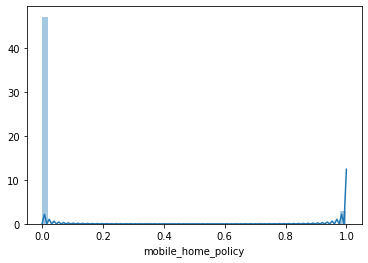

In [3]:
sns.distplot(df.mobile_home_policy)
plt.show()

In [7]:
df.mobile_home_policy.describe()

count    8000.000000
mean        0.058750
std         0.235171
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: mobile_home_policy, dtype: float64

In [19]:
# extract all the numeric cols
import re
num_cols = [re.findall(r'num_.*', i)[0] for i in df.columns if re.match(r'num_.*', i)]
[num_cols.append(i) for i in ['avg_hh_size', 'avg_income', 'purchase_pwr_cls']]
print(num_cols)

['num_houses', 'num_prvt_3rd_prt', 'num_3rd_prt_firm', 'num_3rd_prt_agri', 'num_car', 'num_deliv_van', 'num_scooter', 'num_lorry', 'num_trailer', 'num_tractor', 'num_agri_machine', 'num_moped', 'num_life', 'num_prvt_accid', 'num_fmly_accid', 'num_disability', 'num_fire', 'num_surfbrd', 'num_boat', 'num_bike', 'num_property', 'num_ss', 'avg_hh_size', 'avg_income', 'purchase_pwr_cls']


In [50]:
# convert all others to dummies
drop_cols= num_cols.copy()
drop_cols.append('mobile_home_policy')
df_cat = df.drop(drop_cols, axis=1)
df_cat = df_cat.astype('category')
df_dummy = pd.get_dummies(df_cat, drop_first='True')
df_dummy.head()

,avg_age_2,avg_age_3,avg_age_4,avg_age_5,avg_age_6,customer_maintype_B,customer_maintype_C,customer_maintype_D,customer_maintype_E,customer_maintype_F,...,contrib_property_1,contrib_property_2,contrib_property_3,contrib_property_4,contrib_property_5,contrib_property_6,contrib_ss_2,contrib_ss_3,contrib_ss_4,contrib_ss_5
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df_preprocessed = pd.concat([df_dummy, df[num_cols], df['mobile_home_policy']], axis=1)
df_preprocessed.head()

,avg_age_2,avg_age_3,avg_age_4,avg_age_5,avg_age_6,customer_maintype_B,customer_maintype_C,customer_maintype_D,customer_maintype_E,customer_maintype_F,...,num_fire,num_surfbrd,num_boat,num_bike,num_property,num_ss,avg_hh_size,avg_income,purchase_pwr_cls,mobile_home_policy
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2,4,4,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,3,4,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,4,3,5,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,5,6,0
4,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,2,4,2,0


In [52]:
# imbalanced dataset
# try random forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x = df_preprocessed.drop('mobile_home_policy',axis=1)
y = df_preprocessed.mobile_home_policy
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100, stratify=y)

In [53]:
print(y_test.describe())
print(y_train.describe())

count    2400.000000
mean        0.058750
std         0.235205
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: mobile_home_policy, dtype: float64
count    5600.000000
mean        0.058750
std         0.235177
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: mobile_home_policy, dtype: float64


In [69]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [143]:
rfc = RandomForestClassifier(n_estimators=20).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)

print(accuracy_score(y_test, rfc_pred))

print(f1_score(y_test, rfc_pred))

print(recall_score(y_test, rfc_pred))

0.9345833333333333
0.08187134502923976
0.04964539007092199


In [144]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, rfc_pred)

array([[2236,   23],
       [ 134,    7]])

In [92]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
feature_list = list(df_preprocessed.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: num_car              Importance: 0.04
Variable: contrib_fire_4       Importance: 0.03
Variable: purchase_pwr_cls     Importance: 0.03
Variable: contrib_prvt_3rd_prt_2 Importance: 0.02
Variable: contrib_car_6        Importance: 0.02
Variable: contrib_fire_3       Importance: 0.02
Variable: num_prvt_3rd_prt     Importance: 0.02
Variable: num_fire             Importance: 0.02
Variable: customer_maintype_B  Importance: 0.01
Variable: customer_maintype_C  Importance: 0.01
Variable: customer_maintype_H  Importance: 0.01
Variable: customer_maintype_I  Importance: 0.01
Variable: relation_married_7   Importance: 0.01
Variable: hh_no_child_2        Importance: 0.01
Variable: occp_skilled_lbr_2   Importance: 0.01
Variable: social_cls_b2_2      Importance: 0.01
Variable: social_cls_c_4       Importance: 0.01
Variable: house_owned_9        Importance: 0.01
Variable: cars_one_7           Importance: 0.01
Variable: income_grp_2_3       Importance: 0.01
Variable: income_grp_3_4       Importa

In [51]:


rfc = RandomForestClassifier(n_estimators=20).fit(x_train, y_train)

# predict on test set
rfc_pred = rfc.predict(x_test)

print(accuracy_score(y_test, rfc_pred))

print(f1_score(y_test, rfc_pred))

print(recall_score(y_test, rfc_pred))

,num_houses,num_prvt_3rd_prt,num_3rd_prt_firm,num_3rd_prt_agri,num_car,num_deliv_van,num_scooter,num_lorry,num_trailer,num_tractor,num_agri_machine,num_moped,num_life,num_prvt_accid,num_fmly_accid,num_disability,num_fire,num_surfbrd,num_boat,num_bike,num_property,num_ss,avg_hh_size,avg_income,purchase_pwr_cls
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,1.110125,0.403875,0.014375,0.021625,0.557375,0.010875,0.039750,0.002125,0.010750,0.032750,0.00525,0.071125,0.081375,0.004750,0.00800,0.004750,0.574625,0.000750,0.004625,0.030250,0.008875,0.013750,2.676250,3.796125,4.261625
std,0.420142,0.492230,0.129114,0.145465,0.598542,0.124534,0.225114,0.060174,0.111292,0.232237,0.11715,0.268002,0.388294,0.068761,0.08909,0.075685,0.549972,0.027378,0.073173,0.205159,0.095118,0.117527,0.777182,1.330143,1.997730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,4.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,6.000000
max,10.000000,2.000000,5.000000,1.000000,7.000000,4.000000,8.000000,3.000000,3.000000,5.000000,6.00000,3.000000,8.000000,1.000000,1.00000,2.000000,5.000000,1.000000,2.000000,4.000000,2.000000,2.000000,6.000000,9.000000,8.000000


In [52]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 25 columns):
num_houses          8000 non-null int64
num_prvt_3rd_prt    8000 non-null int64
num_3rd_prt_firm    8000 non-null int64
num_3rd_prt_agri    8000 non-null int64
num_car             8000 non-null int64
num_deliv_van       8000 non-null int64
num_scooter         8000 non-null int64
num_lorry           8000 non-null int64
num_trailer         8000 non-null int64
num_tractor         8000 non-null int64
num_agri_machine    8000 non-null int64
num_moped           8000 non-null int64
num_life            8000 non-null int64
num_prvt_accid      8000 non-null int64
num_fmly_accid      8000 non-null int64
num_disability      8000 non-null int64
num_fire            8000 non-null int64
num_surfbrd         8000 non-null int64
num_boat            8000 non-null int64
num_bike            8000 non-null int64
num_property        8000 non-null int64
num_ss              8000 non-null int64
avg_hh_size  

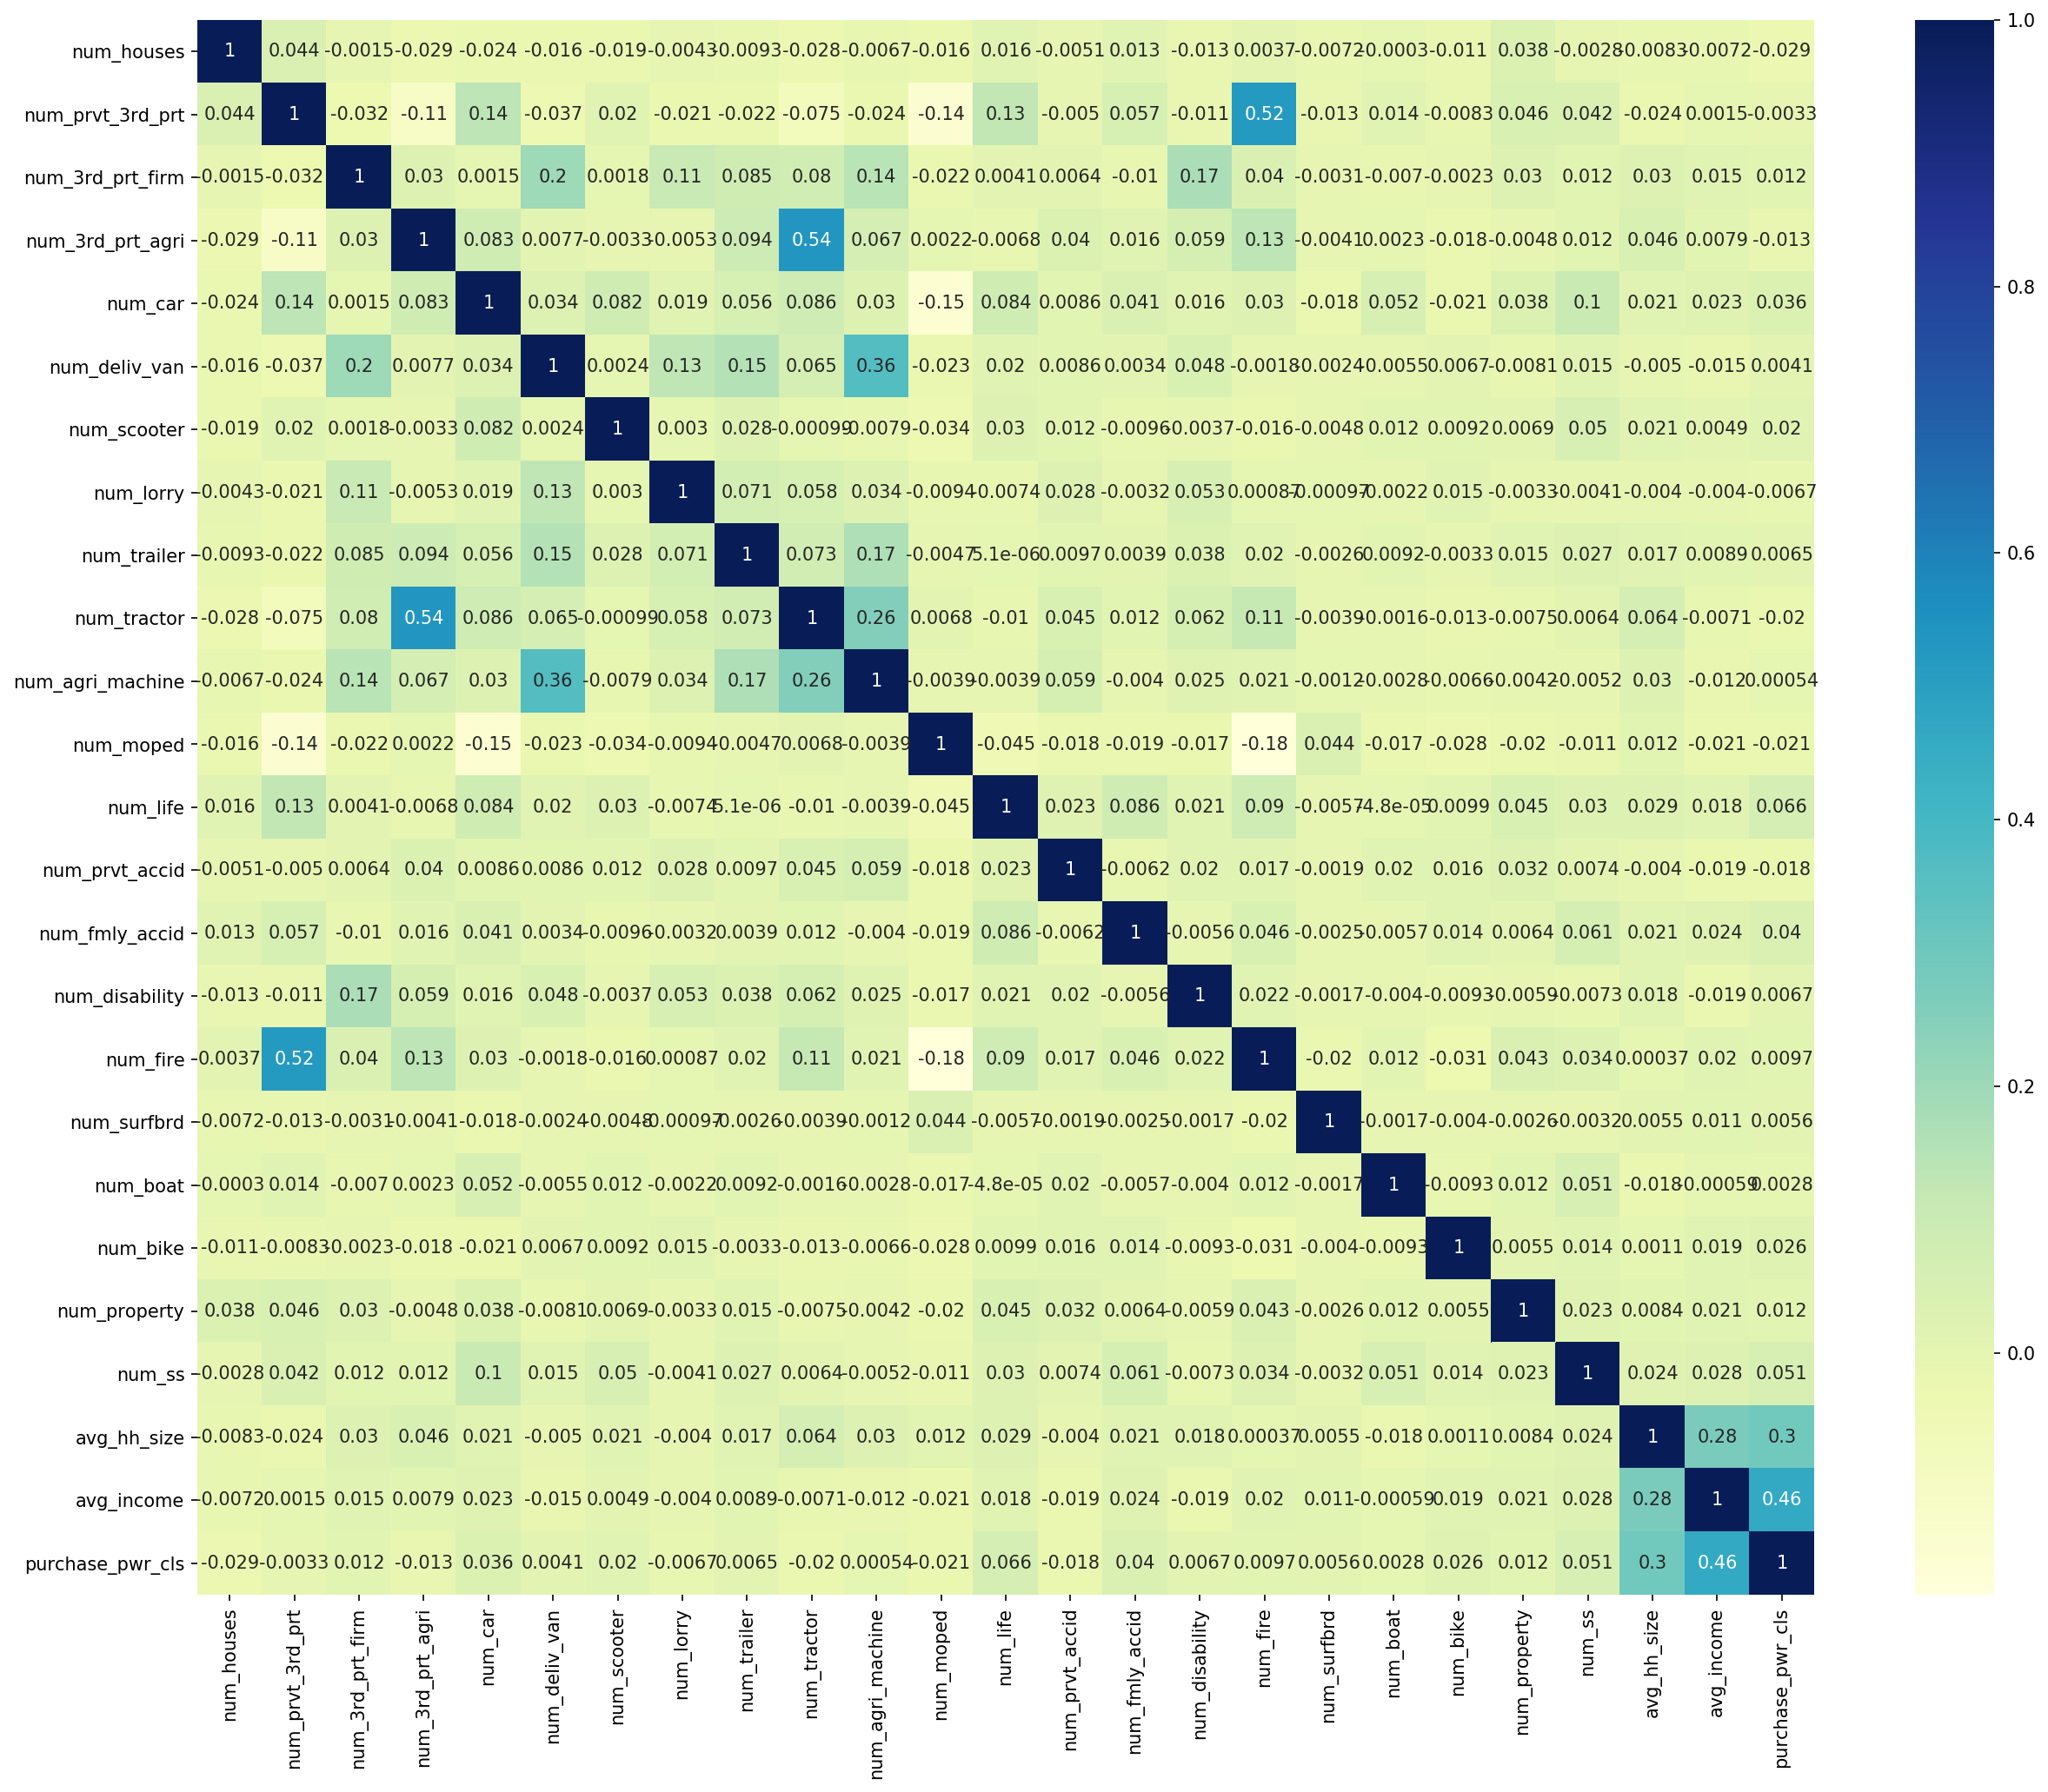

In [53]:
plt.figure(figsize=(20,16), dpi=150)
sns.heatmap(df[num_cols].corr(), annot=True, cmap='YlGnBu')
plt.show()

In [43]:
df.shape

(8000, 81)

In [21]:
df.describe()

,num_houses,avg_hh_size,avg_age,relation_married,relation_living,relation_other,hh_singles,hh_no_child,hh_with_child,education_high,education_medium,education_low,occp_high_status,occp_entrepreneur,occp_farmer,occp_mgmt,occp_skilled_lbr,occp_unskilled_lbr,social_cls_a,social_cls_b1,social_cls_b2,social_cls_c,social_cls_d,house_rented,house_owned,cars_one,cars_two,cars_none,hlth_insr_national,hlth_insr_private,income_grp_1,income_grp_2,income_grp_3,income_grp_4,income_grp_5,avg_income,purchase_pwr_cls,contrib_prvt_3rd_prt,contrib_3rd_prt_firm,contrib_3rd_prt_agri,contrib_car,contrib_deliv_van,contrib_scooter,contrib_lorry,contrib_trailer,contib_tractor,contrib_agri_machine,contrib_moped,contib_life,contrib_prvt_accid,contrib_fmly_accid,contrib_disability,contrib_fire,contrib_surfbrd,contrib_boat,contrib_bike,contrib_property,contrib_ss,num_prvt_3rd_prt,num_3rd_prt_firm,num_3rd_prt_agri,num_car,num_deliv_van,num_scooter,num_lorry,num_trailer,num_tractor,num_agri_machine,num_moped,num_life,num_prvt_accid,num_fmly_accid,num_disability,num_fire,num_surfbrd,num_boat,num_bike,num_property,num_ss,mobile_home_policy
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,1.110125,2.676250,3.002750,6.184000,0.87025,2.295750,1.886000,3.243625,4.298875,1.484875,3.297375,4.602125,1.907125,0.397125,0.549750,2.874500,2.221125,2.296000,1.658125,1.585250,2.207125,3.738000,1.074375,4.178125,4.829250,6.019750,1.332625,1.964500,6.250875,2.753875,2.583375,3.508625,2.730625,0.80975,0.208000,3.796125,4.261625,0.772375,0.040375,0.074500,2.964625,0.054125,0.168750,0.009250,0.018375,0.092125,0.011000,0.215750,0.204875,0.012000,0.019375,0.025625,1.862125,0.001375,0.013000,0.024375,0.01775,0.045000,0.403875,0.014375,0.021625,0.557375,0.010875,0.039750,0.002125,0.010750,0.032750,0.00525,0.071125,0.081375,0.004750,0.00800,0.004750,0.574625,0.000750,0.004625,0.030250,0.008875,0.013750,0.058750
std,0.420142,0.777182,0.804409,1.899564,0.96477,1.710818,1.766605,1.594393,1.976876,1.644342,1.719320,2.278534,1.818354,0.770546,1.114083,1.848223,1.743304,1.685672,1.739720,1.300171,1.535828,1.940638,1.300021,3.094001,3.094195,1.534081,1.206718,1.594069,2.007284,2.009677,2.070950,1.878994,1.956282,1.17302,0.555675,1.330143,1.997730,0.957432,0.366758,0.509639,2.920478,0.561903,0.883952,0.242223,0.195684,0.597229,0.217681,0.814269,0.913513,0.194578,0.220240,0.393685,1.882434,0.053605,0.218144,0.154220,0.22066,0.394645,0.492230,0.129114,0.145465,0.598542,0.124534,0.225114,0.060174,0.111292,0.232237,0.11715,0.268002,0.388294,0.068761,0.08909,0.075685,0.549972,0.027378,0.073173,0.205159,0.095118,0.117527,0.235171
min,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [22]:
import re
mon_cols = [re.findall(r'contrib_.*|contib_.*',x)[0] for x in df.columns if re.match(r'contrib_.*|contib_.*',x)]
monetary = df[mon_cols]
monetary.head()


,contrib_prvt_3rd_prt,contrib_3rd_prt_firm,contrib_3rd_prt_agri,contrib_car,contrib_deliv_van,contrib_scooter,contrib_lorry,contrib_trailer,contib_tractor,contrib_agri_machine,contrib_moped,contib_life,contrib_prvt_accid,contrib_fmly_accid,contrib_disability,contrib_fire,contrib_surfbrd,contrib_boat,contrib_bike,contrib_property,contrib_ss
0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0
3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [17]:
monetary.shape

(8000, 21)

In [18]:
monetary.describe()

,contrib_prvt_3rd_prt,contrib_3rd_prt_firm,contrib_3rd_prt_agri,contrib_car,contrib_deliv_van,contrib_scooter,contrib_lorry,contrib_trailer,contib_tractor,contrib_agri_machine,contrib_moped,contib_life,contrib_prvt_accid,contrib_fmly_accid,contrib_disability,contrib_fire,contrib_surfbrd,contrib_boat,contrib_bike,contrib_property,contrib_ss
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000
mean,0.772375,0.040375,0.074500,2.964625,0.054125,0.168750,0.009250,0.018375,0.092125,0.011000,0.215750,0.204875,0.012000,0.019375,0.025625,1.862125,0.001375,0.013000,0.024375,0.01775,0.045000
std,0.957432,0.366758,0.509639,2.920478,0.561903,0.883952,0.242223,0.195684,0.597229,0.217681,0.814269,0.913513,0.194578,0.220240,0.393685,1.882434,0.053605,0.218144,0.154220,0.22066,0.394645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,3.000000,6.000000,4.000000,8.000000,7.000000,7.000000,9.000000,5.000000,7.000000,6.000000,6.000000,9.000000,6.000000,3.000000,7.000000,8.000000,3.000000,6.000000,1.000000,6.00000,5.000000
